### Homework 1.4.1 - Shooting Method

By using shooting method, solve

$$
\frac{d^2 T}{d x^2} + \alpha (T_0 - T) = 0
$$

Where $\alpha = 5\times10^{-2}$, and $T_0 = 20$, subjected to $T(0) = 50$ and $T(10) = 200$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

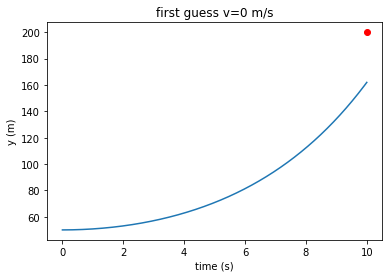

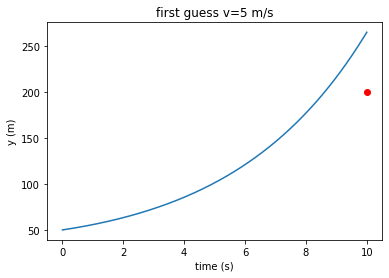

In [27]:
alpha = 0.05
T_0 = 20

T0 = 50
T10 = 200

t0 = 0
t10 = 10

t = np.linspace(t0,t10,1000)

guess1 = 0
guess2 = 5

y_initial = [T0,guess1]

def rhs(y,t):
    return  [y[1],-alpha*(T_0-y[0])]
    
def plot_graph(title, y, t, yf, tf):
    # plot the solution
    plt.plot(t, y[:, 0])
    # plot the boundary at t_final
    plt.plot(tf, yf, 'ro')
    plt.xlabel('time (s)')
    plt.ylabel('y (m)')
    plt.title(title)
    plt.show()
    
plot_graph(f'first guess v={guess1} m/s', odeint(rhs, [T0, guess1], t), t, T10, t10)
plot_graph(f'first guess v={guess2} m/s', odeint(rhs, [T0, guess2], t), t, T10, t10)

f(a)= -38.04979029662459
f(b)= 65.36378494523785
Optimized speed using shooting method is v=1.8396903455838591 m/s


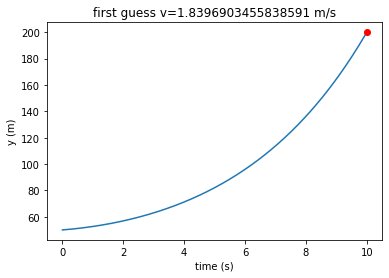

In [20]:
from scipy.optimize import brentq

def objective_func(guess1):
    sol = odeint(rhs, [T0, guess1], t)
    y_final = sol[-1, 0]
    return y_final - T10

print('f(a)=', objective_func(guess1))
print('f(b)=', objective_func(guess2))

guess = brentq(objective_func, guess1, guess2)
print(f'Optimized speed using shooting method is v={guess} m/s')
plot_graph(f'first guess v={guess} m/s', odeint(rhs, [T0, guess], t), t, T10, t10)

___
### Homework 1.4.2 - Finite Difference Method

Solve Homework 1.4.1 using finite difference method

[[ 1.        0.        0.       ...  0.        0.        0.      ]
 [ 1.       -2.000005  1.       ...  0.        0.        0.      ]
 [ 0.        1.       -2.000005 ...  0.        0.        0.      ]
 ...
 [ 0.        0.        0.       ... -2.000005  1.        0.      ]
 [ 0.        0.        0.       ...  1.       -2.000005  1.      ]
 [ 0.        0.        0.       ...  0.        0.        1.      ]]
[ 5.e+01 -1.e-04 -1.e-04 ... -1.e-04 -1.e-04  2.e+02]


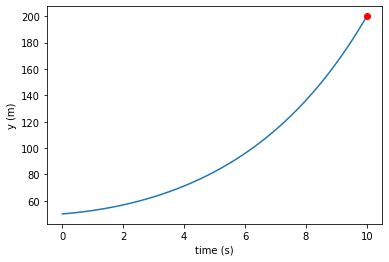

In [26]:
n = 1000
h = (t10-t0) / n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2-alpha*(h**2)
    A[i, i+1] = 1

print(A)

# Get b
b = np.zeros(n+1)
b[0] = T0
b[1:-1] = -alpha*T_0*(h**2)
b[-1] = T10
print(b)

# solve the linear equations A x = b
y = np.linalg.solve(A, b)

t = np.linspace(t0, t10, n + 1)

plt.plot(t, y)
plt.plot(t10, T10, 'ro')
plt.xlabel('time (s)')
plt.ylabel('y (m)')
plt.show()